# <span> Laboratorio di Simulazione Numerica  </span>
## <span> Esercitazione 10 </span>

### Esercizio 10.1

Lo scopo di questo esercizio è quello di risolvere numericamente il problema del commesso viaggiatore sfruttando il <b>Simulated Annealing</b> (SA). Le posizioni delle 32 città sono identiche a quelle generate nella precedente esercitazione, sia nel caso della circonferenza che nel caso del quadrato, così da poter confrontare i risultati ottenuti attraverso i due codici. <br> 
L'idea alla base del Simulated Annealing è quella di campionare possibili percorsi secondo la distribuzione di Boltzmann non normalizzata $p(\vec x) = e^{-\beta L^{(1)}(\vec x)}$ facendo variare la temperatura, e quindi $\beta$, nel tempo. Infatti, man mano che la temperatura si avvicina allo zero, la distribuzione di Boltzmann diventa sempre più piccata attorno al minimo di $L^{(1)}(\vec x)$, che rappresenta la funzione costo del sistema, ovvero la lunghezza del percorso.  <br>
La distribuzione di Boltzmann viene campionata attraverso l'algortimo di Metropolis: ad ogni step dell'algortimo vengono proposte ognuna delle 5 mutazioni (<i>swap</i>, <i>inversion</i>, <i>shift</i>, <i>cycle</i>, <i>swap_sequence</i>) già implementate nel codice della precedente esercitazione; la probabilità di accettazione della mossa proposta sarà data dal rapporto tra il peso di Boltzmann del nuovo percorso e il peso di Boltzmann del percoro precedente. 

Per implementare il codice dell'algoritmo si utilizza la programmazione a oggetti di C++. Viene mantenuta la classe <b>Chromosome</b> utilizzata nella precedente esercitazione; in più viene creata la classe <b>Metropolis</b>, in cui tra i membri privati troviamo: un puntatore alla classe <b>Random</b> e due oggetti di tipo Chromosome, uno contenente il percorso attuale e l'altro contenente il percorso più breve raggiunto fino a quel momento dall'algoritmo. Ogni step dell'algoritmo di Metropolis viene eseguito richiamando il metodo <b>Step</b> della classe.

Per la simulazione abbiamo scelto valori di $\beta$ da $1$ a $30$ ad intervalli di 1 nel caso delle città sulla circonferenza e da $1$ a $50$ sempre ad intervalli di 1 nel caso delle città nel quadrato. Per ogni valore di $\beta$ vengono effettuati $1000$ step dell'algoritmo Metropolis. È importante considerare salti non troppo grandi di temperatura per poter esplorare tutti i possibili percorsi, in modo da non perdere ergodicità e finire in minimi locali. <br>
In entrambi in casi viene riportato il grafico del percorso migliore, confrontandolo con quanto ottenuto tramite l'Algoritmo Genetico nella precedente esercitazione. Viene anche riportato l'andamento della lunghezza del miglior percorso trovato al variare di $\beta$.

#### Città su una circonferenza di raggio $R=1$

In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'

In [2]:
# carico dati - circonferenza
x_circ, y_circ = np.loadtxt("10.1/init_circ.dat", usecols=(1,2), delimiter=' ', unpack='true')

best_path_c = np.append(np.loadtxt("10.1/final_path_circle.out").astype(int),0)
bp_GA_c = np.append(np.loadtxt("../9/9.1/final_path_circle.out").astype(int),0)

# costruisco un vettore con le posizioni delle città nell'ordine in cui queste compaiono in best path
xc_final = np.zeros(best_path_c.size)
yc_final = np.zeros(best_path_c.size)
xc_GA = np.zeros(bp_GA_c.size)
yc_GA = np.zeros(bp_GA_c.size)

for i in range (best_path_c.size):
    xc_final[i] = x_circ[best_path_c[i]]
    yc_final[i] = y_circ[best_path_c[i]]
    xc_GA[i] = x_circ[bp_GA_c[i]]
    yc_GA[i] = y_circ[bp_GA_c[i]]
    
beta_c, length_c = np.loadtxt("10.1/length_temp_circle.out", usecols=(0,1), delimiter=' ', unpack='true')
bp_length_GA_c = np.loadtxt("../9/9.1/bp_length_circle.out", usecols=(1), unpack='true')

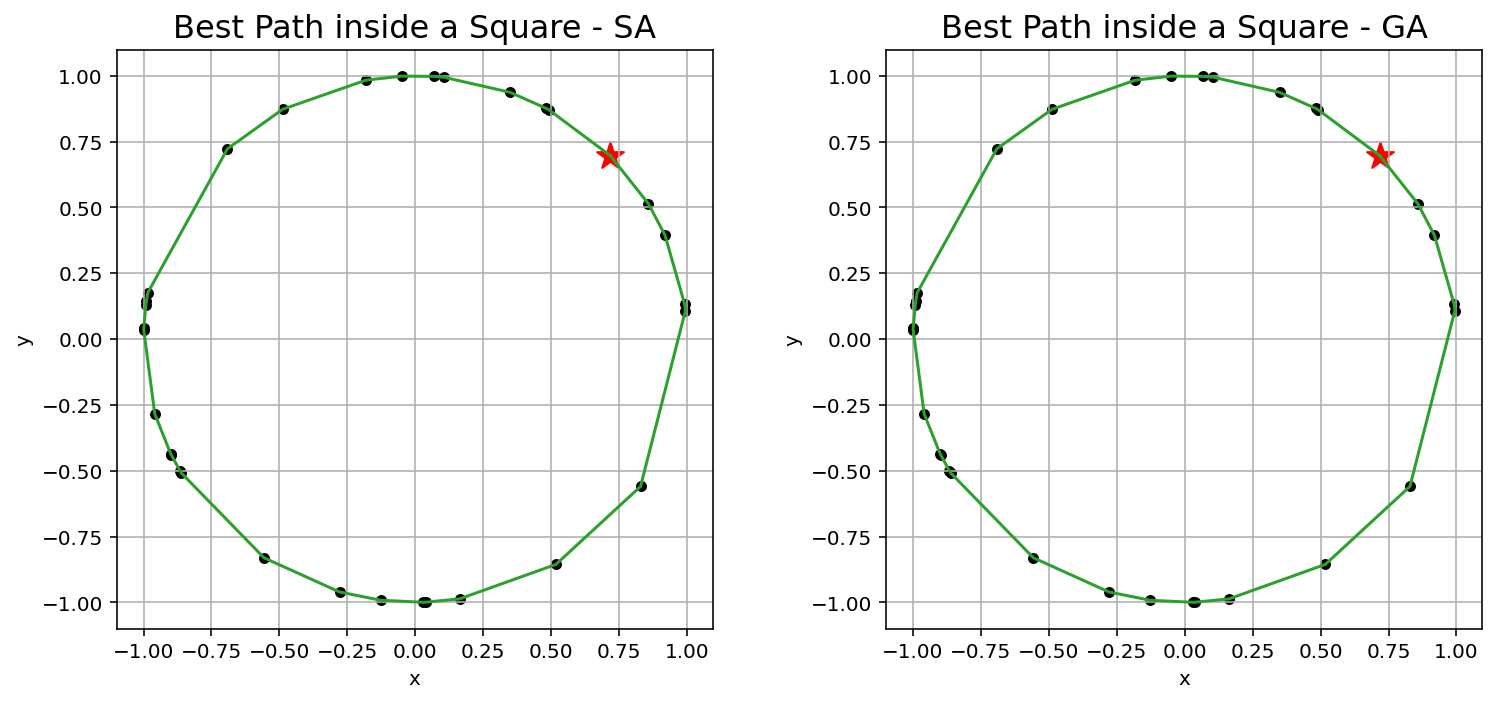

      ###### Simulated Annealing #####               ####### Genetic Algorithm #######
      ### Best path length: 6.2403 ###               ### Best path length: 6.2403 ####
      ################################               ################################# 




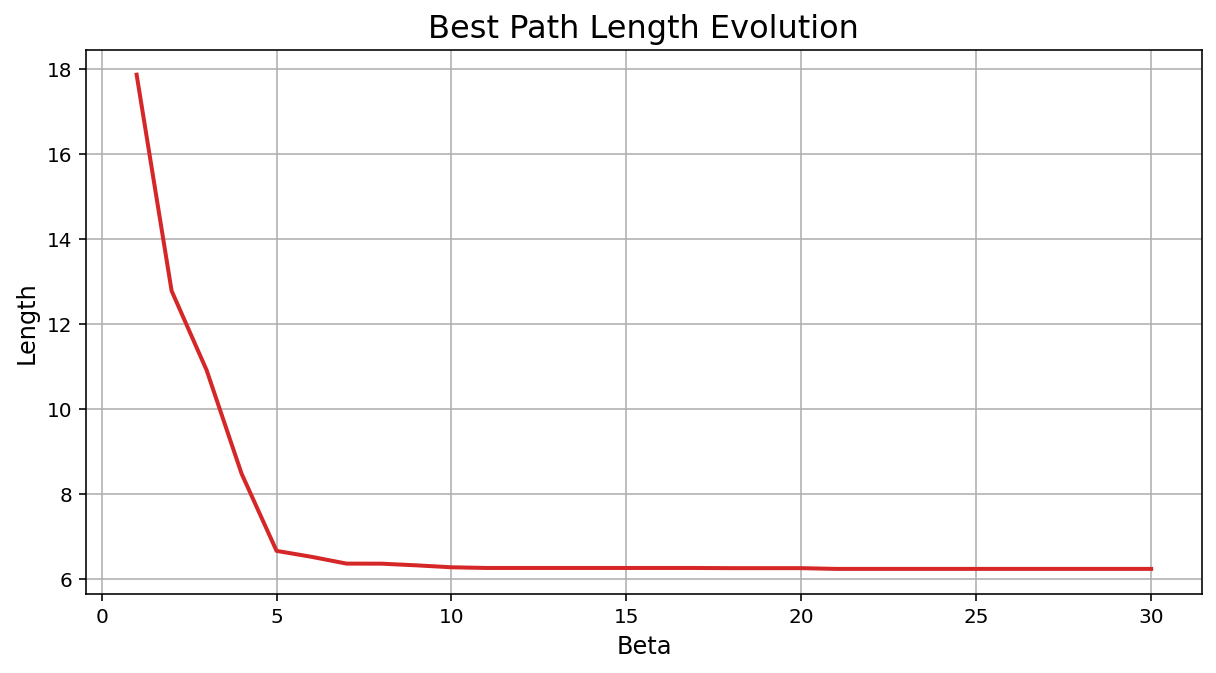

In [3]:
x_list = [xc_final, xc_GA]
y_list = [yc_final, yc_GA]
algorithm = ["SA", "GA"]

# plot
fig, ax = plt.subplots(1, 2, figsize=(10.5, 5))
ax = ax.reshape(-1)

for i in range(2):
    ax[i].scatter(x_circ, y_circ, s=20, c="black")
    ax[i].scatter(x_circ[0], y_circ[0], marker="*", s=200,  c="red")
    ax[i].plot(x_list[i], y_list[i], c='tab:green')
    ax[i].set_xlabel(r'x', fontsize=10)
    ax[i].set_ylabel(f'y', fontsize=10)
    ax[i].set_title(f'Best Path inside a Square - {algorithm[i]}', fontsize=16)
    ax[i].grid(True)
plt.tight_layout(w_pad=3.5)
plt.show()

print("      ###### \033[4mSimulated Annealing\033[0m #####               ####### \033[4mGenetic Algorithm\033[0m #######")
print("      ### Best path length:\033[1m", length_c[-1], "\033[0m###               ### Best path length:\033[1m", bp_length_GA_c[-1], "\033[0m####")
print("      ################################               ################################# \n\n")
    
fig = plt.figure(figsize=(10, 5))
plt.plot(beta_c, length_c, c='tab:red', lw=2)
plt.grid(True)
plt.xlabel('Beta', fontsize=12)
plt.ylabel('Length', fontsize=12)
plt.title(f'Best Path Length Evolution', fontsize=16)

plt.show()

Il miglior percorso trovato con il Simulated Annealing è identico a quello che avevamo ottenuto tramite l'Algoritmo Genetico.

Facciamo ora una breve osservazione sulla scelta della temperatura di partenza. Sono partito dal valore $\beta=1$ in quanto per valori di $\beta$ minori (alte temperature) il rate di accettazione dell'algoritmo di Metropolis era molto vicino a 1: in questo caso il campionamento tramite il Metropolis diventa sempre più simile a un random walk nello spazio di tutti i possibili percorsi, senza iniziare la fase di ottimizzazione. Partendo da $\beta=1$ di osserva fin da subito una rapida discesa nella lunghezza del miglior percorso, segno del fatto che il processo di ottimizzazione è cominciato.

#### Città in un quadrato di lato $L=1$

In [4]:
# carico dati - quadrato
x_square, y_square = np.loadtxt("10.1/init_square.dat", usecols=(1,2), delimiter=' ', unpack='true')

best_path_s = np.append(np.loadtxt("10.1/final_path_square.out").astype(int),0)
bp_GA_s = np.append(np.loadtxt("../9/9.1/final_path_square.out").astype(int),0)

# costruisco un vettore con le posizioni delle città nell'ordine in cui queste compaiono in best path
xs_final = np.zeros(best_path_s.size)
ys_final = np.zeros(best_path_s.size)
xs_GA = np.zeros(best_path_s.size)
ys_GA = np.zeros(best_path_s.size)

for i in range (best_path_s.size):
    xs_final[i] = x_square[best_path_s[i]]
    ys_final[i] = y_square[best_path_s[i]]
    xs_GA[i] = x_square[bp_GA_s[i]]
    ys_GA[i] = y_square[bp_GA_s[i]]
    
beta_s, length_s = np.loadtxt("10.1/length_temp_square.out", usecols=(0,1), delimiter=' ', unpack='true')
bp_length_GA_s = np.loadtxt("../9/9.1/bp_length_square.out", usecols=(1), unpack='true')

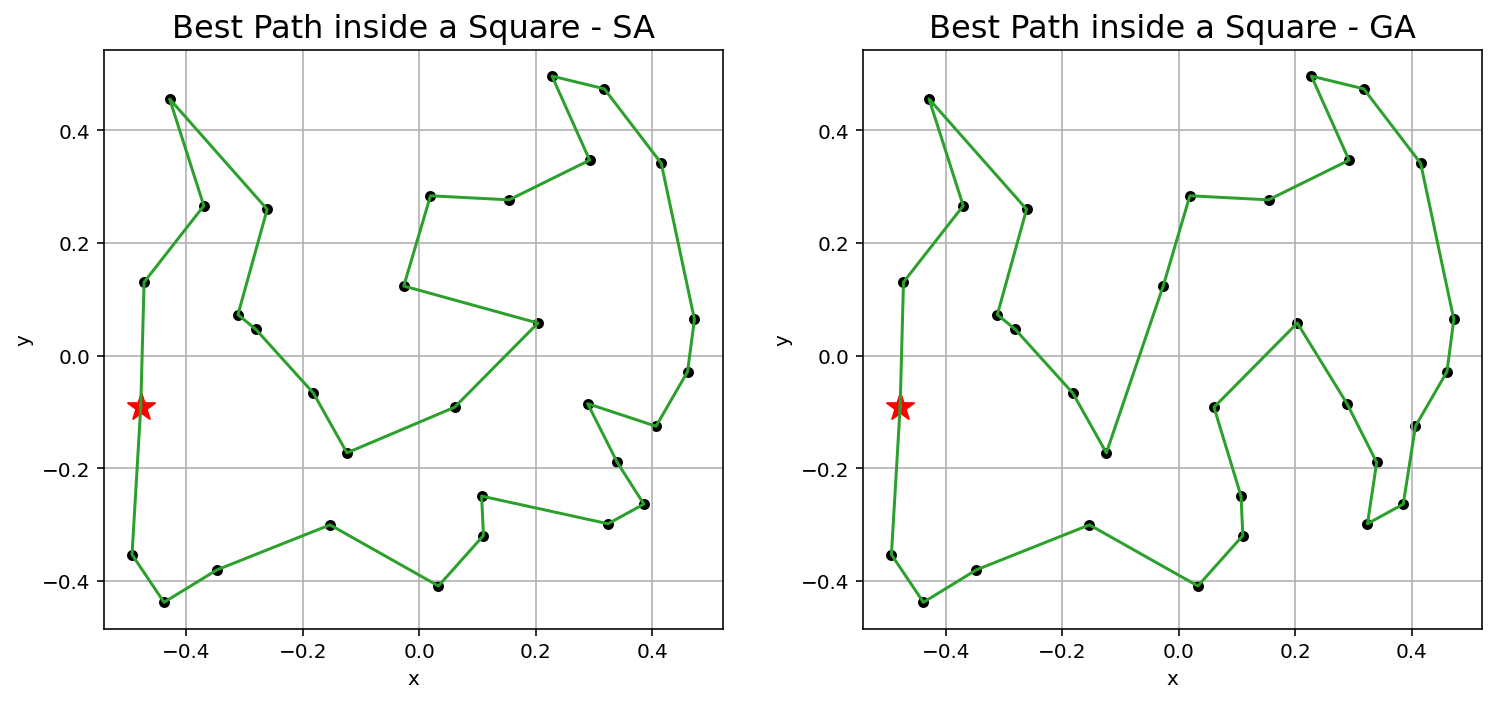

      ###### Simulated Annealing ######            ####### Genetic Algorithm #######
      ### Best path length: 5.07041 ###            ### Best path length: 5.08796 ###
      #################################            ################################# 




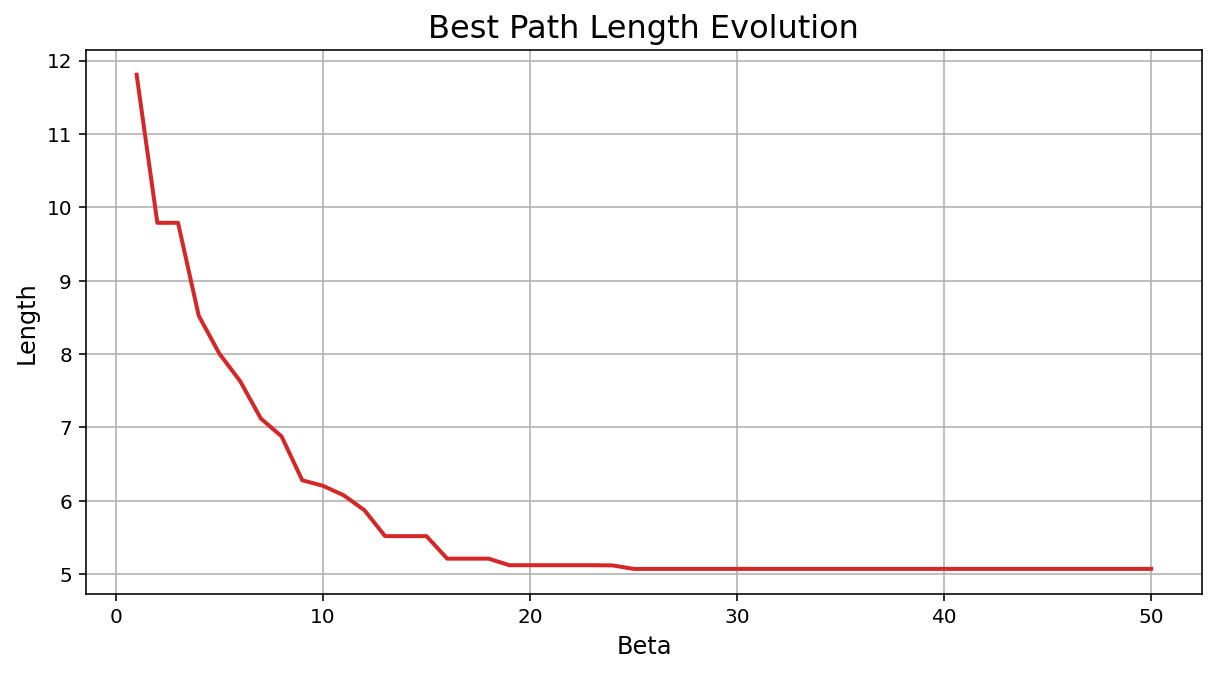

In [5]:
x_list = [xs_final, xs_GA]
y_list = [ys_final, ys_GA]
algorithm = ["SA", "GA"]

# plot
fig, ax = plt.subplots(1, 2, figsize=(10.5, 5))
ax = ax.reshape(-1)

for i in range(2):
    ax[i].scatter(x_square, y_square, s=20, c="black")
    ax[i].scatter(x_square[0], y_square[0], marker="*", s=200,  c="red")
    ax[i].plot(x_list[i], y_list[i], c='tab:green')
    ax[i].set_xlabel(r'x', fontsize=10)
    ax[i].set_ylabel(f'y', fontsize=10)
    ax[i].set_title(f'Best Path inside a Square - {algorithm[i]}', fontsize=16)
    ax[i].grid(True)
    
plt.tight_layout(w_pad=2.5)

plt.show()

print("      ###### \033[4mSimulated Annealing\033[0m ######            ####### \033[4mGenetic Algorithm\033[0m #######")
print("      ### Best path length:\033[1m", length_s[-1], "\033[0m###            ### Best path length:\033[1m", bp_length_GA_s[-1], "\033[0m###")
print("      #################################            ################################# \n\n")
    
fig = plt.figure(figsize=(10, 5))
plt.plot(beta_s, length_s, c='tab:red', lw=2)
plt.grid(True)
plt.xlabel('Beta', fontsize=12)
plt.ylabel('Length', fontsize=12)
plt.title(f'Best Path Length Evolution', fontsize=16)

plt.show()

In questo caso tramite il Simulated Annealing siamo riusciti a trovare un percorso più breve rispetto a quello ottenuto attraverso l'Algoritmo Genetico. Questo è dovuto al fatto che l'Algoritmo Genetico è rimasto incastrato in un minimo locale. <br>
Infine notiamo che, soprattutto nel caso delle città all'interno di un quadrato, il Simulated Annealing risulta più efficiente dell'Algoritmo Genetico, richiedendo infatti un minor tempo di esecuzione.

### Esercizio 10.2

Lo scopo di questo esercizio è quello di parallelizzare il codice dell'Algoritmo Genetico utilizzato nella precedente esercitazione in modo da rendere più efficiente la ricerca del miglior percorso nel caso delle città situate all'interno di un quadrato. È stato modificato solamente il main del codice sfruttando la libreria MPICH per il calcolo parallelo. <br>
Vengono utilizzati $4$ processi che risolvono in parallelo il problema del commesso viaggiatore, ognuno dei quali è identificato dal valore della variabile intera <b>rank</b>. Innanzitutto in ogni processo viene impostato un seme diverso per il generatore di numeri casuali in modo da creare delle popolazioni iniziali differenti. Ad ogni generazione la popolazione evolve in maniera indipendente in ogni core. Ogni $100$ generazioni avviene la cosiddetta fase di migrazione. Per prima cosa viene definito un vettore contenente i possibili valori della variabile rank, ovvero un vettore in cui ogni compenente corrisponde a un particolare processo. Il primo processo (rank 0) modifica tale vettore facendone una permutazione casuale; l'informazione riguardo al nuovo vettore di rank viene poi comunicata a tutti i core tramite <b>MPI_BCAST</b>. I processi corrispondenti ai primi due elementi del vettore di rank si scambiano tra loro il miglior percorso attraverso le comunicazioni <b>MPI_SEND</b> e <b>MPI_RECV</b>; lo stesso avviene per i processi corrispondenti agli ultimi due elementi del vettore. Una volta scambiati i percorsi migliori, ogni processo riordina la propria popolazione. In ogni core la popolazione viene evoluta per $2000$ generazioni.

Di seguito viene riportato per ogni processo il miglior percorso raggiunto al termine dell'evoluzione.

In [6]:
# carico dati - quadrato
x_square, y_square = np.loadtxt("10.2/init_square.dat", usecols=(1,2), delimiter=' ', unpack='true')

best_path_1 = np.append(np.loadtxt("10.2/final_path1.out").astype(int),0)
best_path_2 = np.append(np.loadtxt("10.2/final_path2.out").astype(int),0)
best_path_3 = np.append(np.loadtxt("10.2/final_path3.out").astype(int),0)
best_path_4 = np.append(np.loadtxt("10.2/final_path4.out").astype(int),0)

gen, best_length_1 = np.loadtxt("10.2/bp_length_square1.out", usecols=(0,1), delimiter=' ', unpack='true')
best_length_2 = np.loadtxt("10.2/bp_length_square2.out", usecols=(1))
best_length_3 = np.loadtxt("10.2/bp_length_square3.out", usecols=(1))
best_length_4 = np.loadtxt("10.2/bp_length_square4.out", usecols=(1))

best_length_GA = np.loadtxt("../9/9.1/bp_length_square.out", usecols=(1))

x1_final=np.zeros(best_path_1.size)
x2_final=np.zeros(best_path_2.size)
x3_final=np.zeros(best_path_3.size)
x4_final=np.zeros(best_path_4.size)
y1_final=np.zeros(best_path_1.size)
y2_final=np.zeros(best_path_2.size)
y3_final=np.zeros(best_path_3.size)
y4_final=np.zeros(best_path_4.size)

bp_list = [best_path_1, best_path_2, best_path_3, best_path_4]
x_list = [x1_final, x2_final, x3_final, x4_final]
y_list = [y1_final, y2_final, y3_final, y4_final]

for i in range (4):
    x_list[i]=np.zeros(bp_list[i].size)
    y_list[i]=np.zeros(bp_list[i].size)
    
for i in range (4):
    for j in range (bp_list[i].size):
        x_list[i][j] = x_square[bp_list[i][j]]
        y_list[i][j] = y_square[bp_list[i][j]]

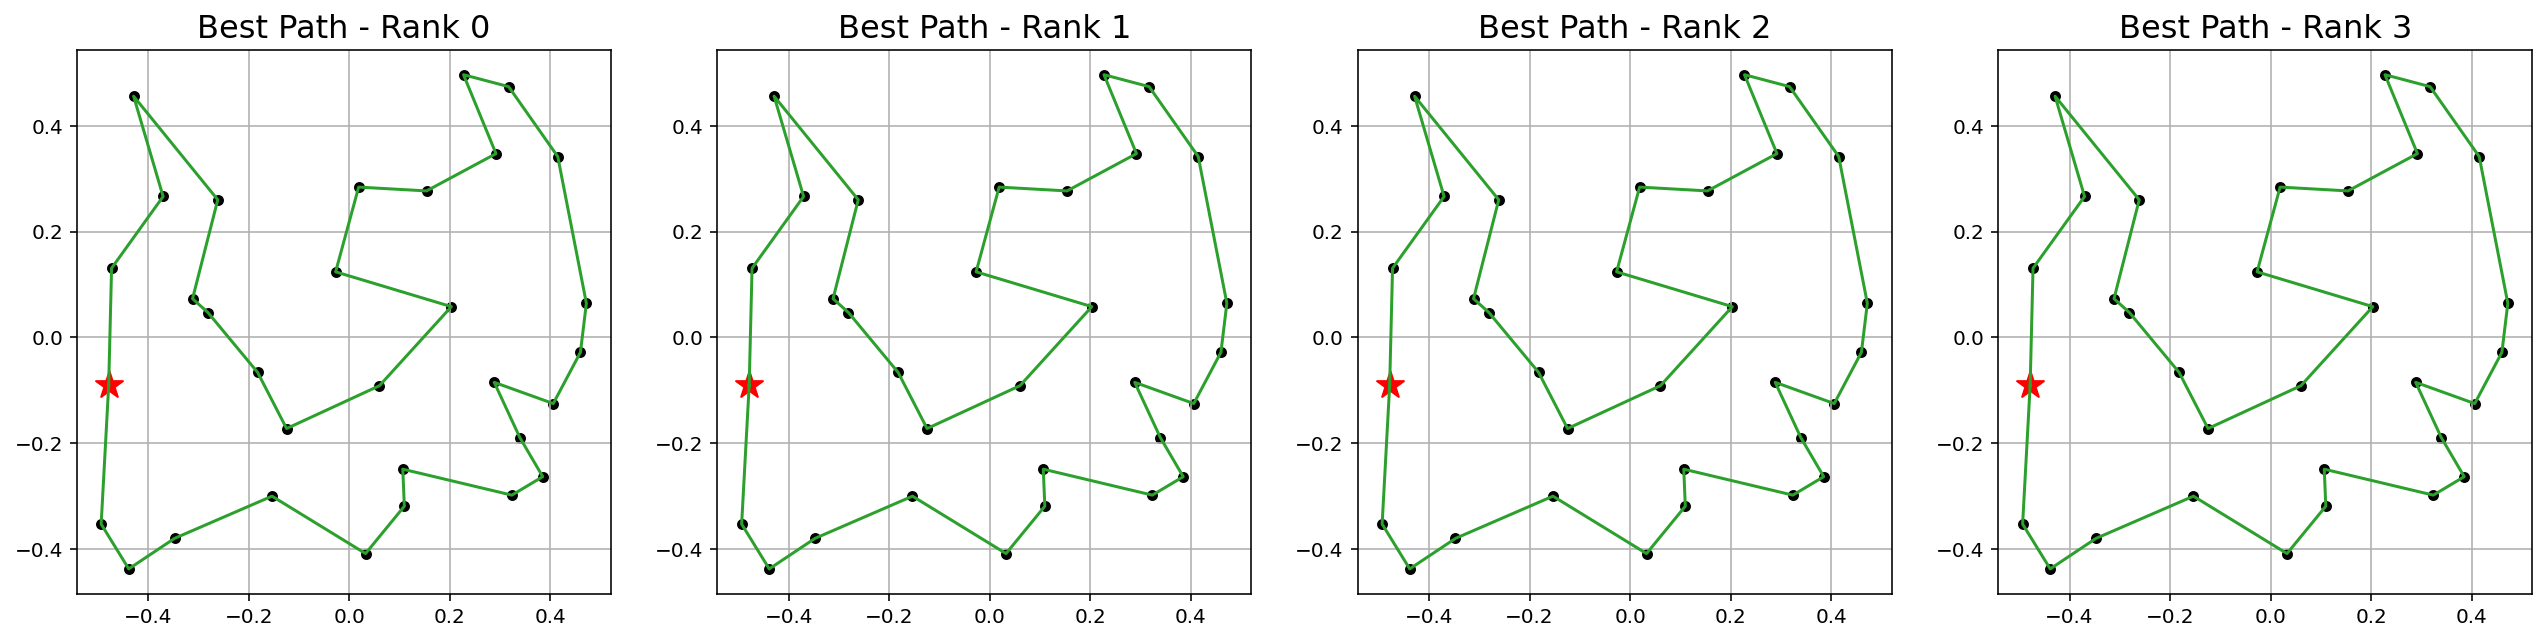

   ########## Parallel GA ##########
   ### Best path length: 5.07041 ###
   #################################


In [7]:
# plot
fig, ax = plt.subplots(1, 4, figsize=(22, 5))
ax = ax.reshape(-1)

for i in range(4):
    ax[i].scatter(x_square, y_square, s=20, c="black")
    ax[i].scatter(x_square[0], y_square[0], marker="*", s=200,  c="red")
    ax[i].plot(x_list[i], y_list[i], c='tab:green')
    ax[i].set_title(f'Best Path - Rank {i}', fontsize=16)
    ax[i].grid(True)
    
#plt.tight_layout(w_pad=2)

plt.show()

print("   ########## \033[4mParallel GA\033[0m ##########")
print("   ### Best path length:\033[1m", best_length_1[-1], "\033[0m###")
print("   #################################")

Tutti e $4$ i processi hanno raggiunto il miglior percorso, che coincide con quello trovato tramite il Simulated Annealing.

Di seguito viene riportato l'andamento della lunghezza del miglior percorso in funzione del numero di generazione per tutti e $4$ i core e viene confrontato con quanto ottenuto tramite l'Algoritmo Genetico non parallelizzato.

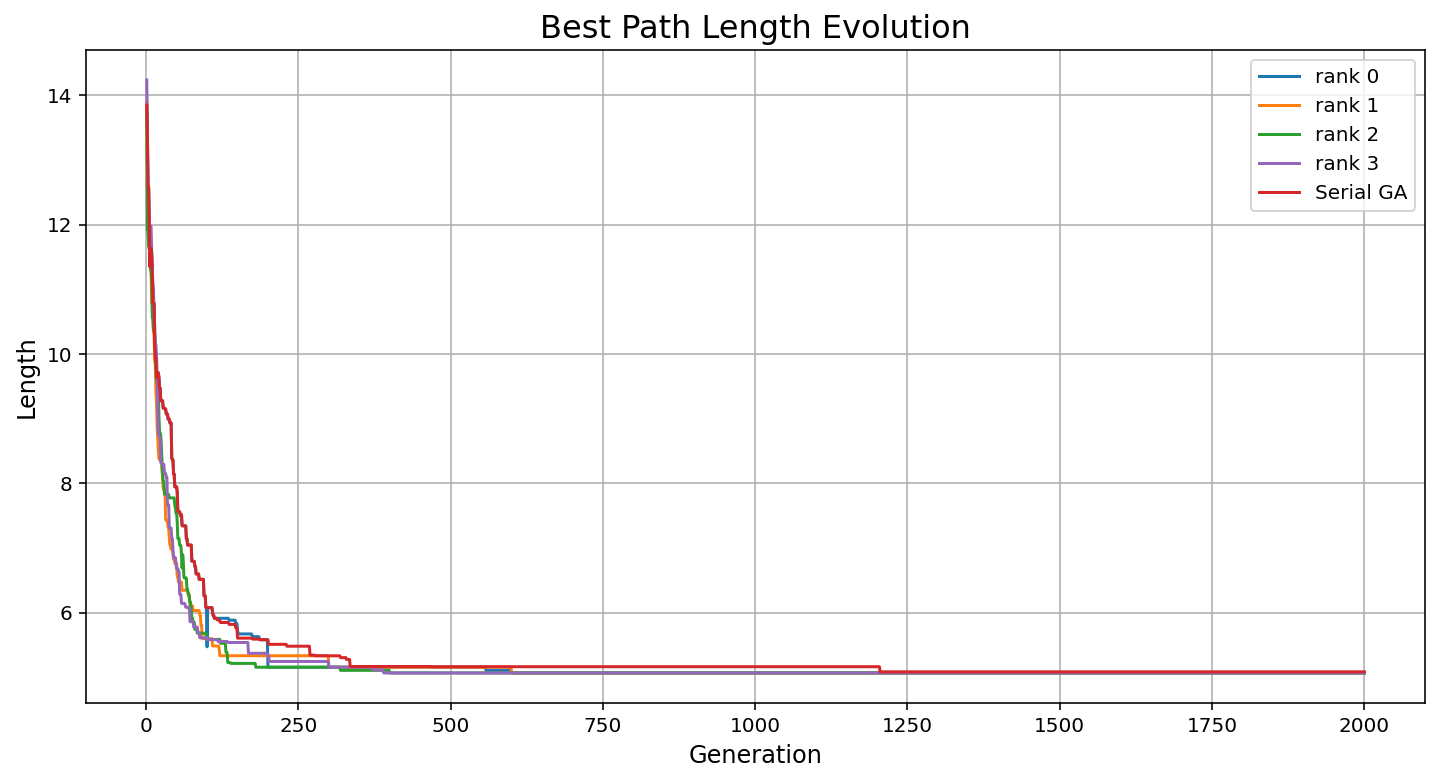

In [8]:
fig = plt.figure (figsize=(12,6))
plt.plot (gen, best_length_1, label = "rank 0", c='tab:blue', lw=1.5)
plt.plot (gen, best_length_2, label = "rank 1", c='tab:orange', lw=1.5)
plt.plot (gen, best_length_3, label = "rank 2", c='tab:green', lw=1.5)
plt.plot (gen, best_length_4, label = "rank 3", c='tab:purple', lw=1.5)
plt.plot (gen, best_length_GA, label = "Serial GA", c='tab:red', lw=1.5)
plt.grid(True)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Length', fontsize=12)
plt.title(f'Best Path Length Evolution', fontsize=16)
plt.legend(loc = 'best', fontsize=10)
plt.show()

Come si può notare da questo grafico, l'utilizzo del calcolo parallelo rende più efficiente l'Algortimo Genetico. Infatti, sebbene non si notino particolari differenze nel raggiungere percorsi di breve lunghezza, la parallelizzazione del codice permette una migliore esplorazione nello spazio dei possibili percorsi, velocizzando la convergenza dell'algoritmo: dopo circa $600$ generazioni tutti i core hanno raggiunto il miglior percorso, mentre l'Algoritmo Genetico in serie impiega poco più del doppio delle generazioni per convergere a un percorso che per di più risulta leggermente più lungo. 